In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [47]:
data = pd.read_csv("Dataset_LR/weight-height.csv")

In [48]:
data.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [49]:
data["Gender"].value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

In [50]:
data.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [51]:
male_height = data[data["Gender"]=='Male']["Height"]

In [52]:
male_height.mean()

69.02634590621741

In [53]:
male_height.max()

78.9987423463896

In [54]:
male_height.min()

58.4069049317498

In [55]:
female_height = data[data["Gender"]=='Female']["Height"]

In [56]:
female_height.mean()

63.70877360342507

In [57]:
female_height.min()

54.2631333250971

In [58]:
female_height.max()

73.3895858660697

In [59]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [60]:
male_weight = data[data["Gender"]=='Male']["Weight"]

In [61]:
male_weight

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
4995    177.131052
4996    159.285228
4997    199.195400
4998    185.905909
4999    198.903012
Name: Weight, Length: 5000, dtype: float64

In [62]:
male_weight.mean()

187.0206206581932

In [63]:
male_weight.min()

112.902939447818

In [64]:
male_weight.max()

269.989698505106

In [65]:
female_weight = data[data["Gender"]=='Female']["Weight"]

In [66]:
female_weight.mean(),female_weight.min(),female_weight.max()

(135.86009300746835, 64.700126712753, 202.237213739559)

## Plotting the data

<Axes: xlabel='Height', ylabel='Count'>

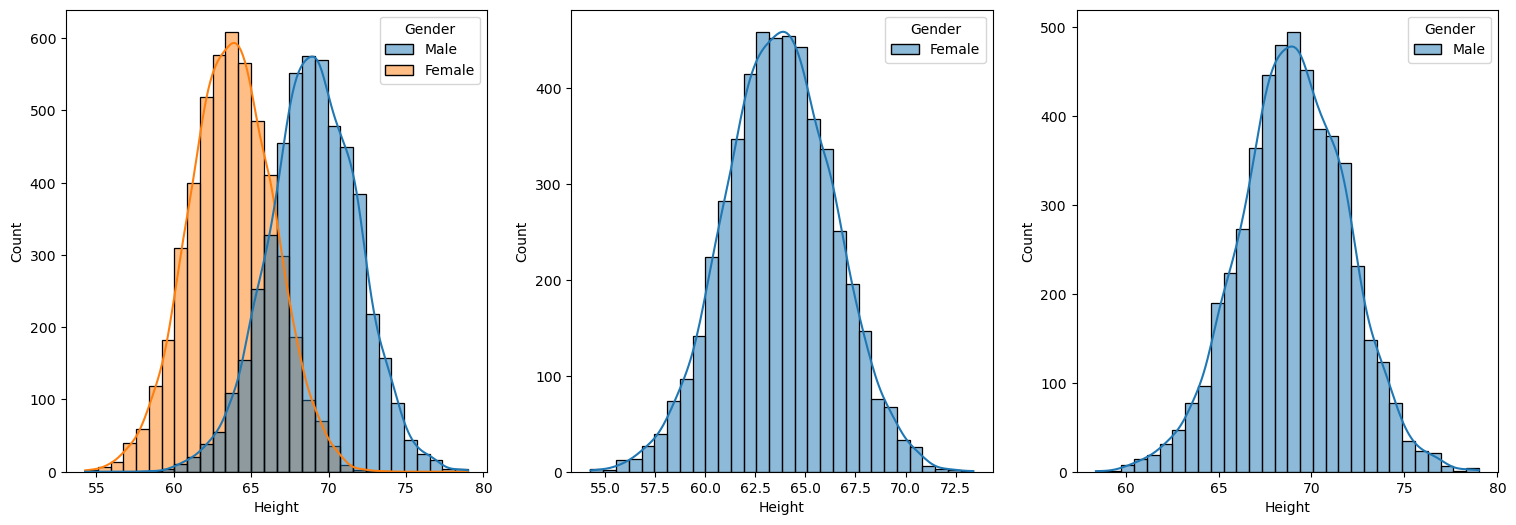

In [67]:
fig,axis=plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data=data,x='Height',bins=30,kde=True,hue="Gender")
plt.subplot(142)
sns.histplot(data=data[data["Gender"]=='Female'],x='Height',bins=30,kde=True,hue="Gender")
plt.subplot(143)
sns.histplot(data=data[data["Gender"]=='Male'],x='Height',bins=30,kde=True,hue="Gender")


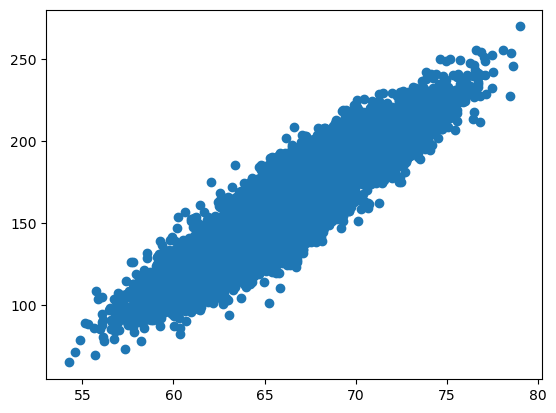

In [68]:
plt.scatter(data = data,x='Height',y='Weight')

In [73]:
X=data[['Height']]
y=data['Weight']

In [74]:
X.shape,y.shape

((10000, 1), (10000,))

In [75]:

X_train, X_test, y_train, y_test = train_test_split( X,y, train_size = 0.80, test_size = 0.20, random_state = 42 )

In [78]:
X_train.shape[0],X_test.shape[0]

(8000, 2000)

In [79]:
y_train.shape[0],y_test.shape[0]

(8000, 2000)

## Scaling the training data

In [82]:
from sklearn.preprocessing import StandardScaler

scalling = StandardScaler()
X_train= scalling.fit_transform(X_train)
X_test = scalling.transform(X_test)

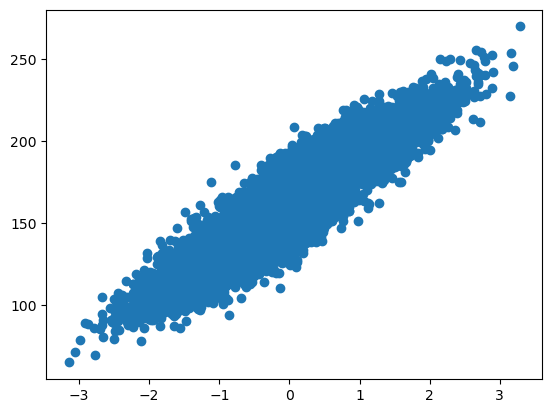

In [84]:
plt.scatter(X_train,y_train)

In [85]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [86]:
regressor.coef_

array([29.61903439])

In [87]:
regressor.intercept_

161.3267623130612

In [96]:
y_predict_train = regressor.predict(X_train)

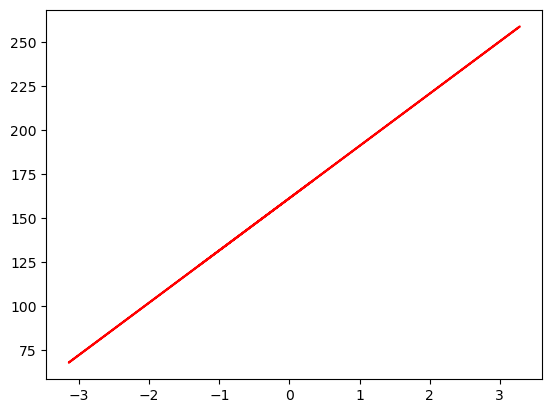

In [97]:
plt.plot(X_train,y_predict_train,'r')

In [99]:
## predict test data 

y_predict_test=regressor.predict(X_test)

In [102]:
y_predict_train.shape

(8000,)

In [103]:
y_predict_test.shape

(2000,)

## Performance metrics = MAE,MSE,RMSE

In [104]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [111]:
mae = mean_absolute_error(y_test,y_predict_test)
mse = mean_squared_error(y_test,y_predict_test)
rmse = np.sqrt(mse)

In [114]:
print(mae)
print(mse)
print(rmse)

9.691933801884568
149.0035041844812
12.206699151878905


## Check Accurace of the model


In [115]:
from sklearn.metrics import r2_score

In [116]:
score = r2_score(y_test,y_predict_test)

In [117]:
score

0.85773177770385